# Introduction to Text generation

This notebook explains how we can split a given corpus of data into features and labels and then train a neural network to predict the next word in a sentence.

1. Create a corpus - break the text down to list of sentences.
2. Create a word_index(vocabulary) from the text.
3. Tokenize the data and create n-gram sequence for each sequence of the corpus.
4. Pad those sequences.
5. Segregate features from the sequences by reserving the last element of the array as labels.


In [2]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.13.1


#### Step 1: Create a corpus

In [4]:
data = "October arrived, spreading a damp chill over the grounds and into the castle.\n Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud."


In [5]:
## Instantiate the Tokenizer object
tokenizer = Tokenizer()            # Initialize the tokenizer for text preprocessing

## Create a corpus by converting text to lowercase and splitting by newline characters
corpus = data.lower().split("\n")  # Convert text to lowercase and split into individual lines
print(corpus)                      # Print the corpus to check the result

['october arrived, spreading a damp chill over the grounds and into the castle.', ' madam pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.', ' her pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. ginny weasley, who had been looking pale, was bullied into taking some by percy.', ' the steam pouring from under her vivid hair gave the impression that her whole head was on fire.', " raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and hagrid's pumpkins swelled to the size of garden sheds.", " oliver wood's enthusiasm for regular training sessions, however, was not dampened, which was why harry was to be found, late one stormy saturday afternoon a few days before halloween, returning to gryffindor tower, drenched to the skin and splattered with mud."]


#### Step 2: Train the tokenizer and create word encoding dictionary

In [7]:
## Fit the tokenizer on the corpus to build the word index
tokenizer.fit_on_texts(corpus)              # Tokenize the text data to build the vocabulary

## Calculate the vocabulary size, adding 1 for the padding token
vocab_size = len(tokenizer.word_index) + 1  # Include an extra token for padding

print(tokenizer.word_index)  # Print the word index mapping words to their token ids
print(vocab_size)            # Print the total vocabulary size

{'the': 1, 'was': 2, 'and': 3, 'to': 4, 'a': 5, 'into': 6, 'of': 7, 'her': 8, 'for': 9, 'on': 10, 'castle': 11, 'by': 12, 'size': 13, 'days': 14, 'october': 15, 'arrived': 16, 'spreading': 17, 'damp': 18, 'chill': 19, 'over': 20, 'grounds': 21, 'madam': 22, 'pomfrey': 23, 'nurse': 24, 'kept': 25, 'busy': 26, 'sudden': 27, 'spate': 28, 'colds': 29, 'among': 30, 'staff': 31, 'students': 32, 'pepperup': 33, 'potion': 34, 'worked': 35, 'instantly': 36, 'though': 37, 'it': 38, 'left': 39, 'drinker': 40, 'smoking': 41, 'at': 42, 'ears': 43, 'several': 44, 'hours': 45, 'afterward': 46, 'ginny': 47, 'weasley': 48, 'who': 49, 'had': 50, 'been': 51, 'looking': 52, 'pale': 53, 'bullied': 54, 'taking': 55, 'some': 56, 'percy': 57, 'steam': 58, 'pouring': 59, 'from': 60, 'under': 61, 'vivid': 62, 'hair': 63, 'gave': 64, 'impression': 65, 'that': 66, 'whole': 67, 'head': 68, 'fire': 69, 'raindrops': 70, 'bullets': 71, 'thundered': 72, 'windows': 73, 'end': 74, 'lake': 75, 'rose': 76, 'flower': 77, '

#### Step 3: Create N-gram sequence

<center>
    <img src="images/ngram.png" width="500" />
</center>

In [10]:
# Create n-gram sequences of each text sequence
input_sequences = []                                 # Initialize an empty list to store n-gram sequences
for line in corpus:                                  # Iterate over each line in the corpus
    tokens = tokenizer.texts_to_sequences([line])[0] # Convert the line into a sequence of tokens using the tokenizer
    for i in range(1, len(tokens)):                  # Iterate through the token sequence to create n-grams
        n_gram_sequence = tokens[:i+1]               # Create an n-gram sequence from the beginning up to the current token index
        input_sequences.append(n_gram_sequence)      # Append the n-gram sequence to the list of input sequences

#### Step 4: Pad those sequence

In [12]:
## Calculate the maximum sequence length from the input sequences
max_seq_len = max([len(i) for i in input_sequences])  # Find the length of the longest sequence in the list

## Pad all sequences to the same length
input_seq_array = np.array(pad_sequences(             # Convert padded sequences into a numpy array
    input_sequences,                                  # List of n-gram sequences to pad
    maxlen=max_seq_len,                               # Specify the maximum length for padding
    padding='pre'                                     # Pad sequences at the beginning
))

#### Step 5: Segregate features

<center>
    <img src="images/extra.png" width="800" />
</center>

In [15]:
## Creating features (X) and labels (y)
X = input_seq_array[:, :-1]      # Features: all tokens except the last one in each sequence
labels = input_seq_array[:, -1]  # Labels: only the last token in each sequence

## One-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)  # Convert labels to one-hot encoding format

In [16]:
print(tokenizer.word_index['mud'])  # Print the index of the word 'mud' from the tokenizer's word index
print()
print(X[0])                         # Print the first sequence of features (X) to inspect the token values
print()
print(y[0])                         # Print the one-hot encoded label for the first sequence to verify the encoding

116

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Define the LSTM model

In [18]:
# Initialize a Sequential model
model = tf.keras.Sequential([  # Initialize a Sequential model

    tf.keras.layers.Embedding(vocab_size,                    # Set the vocabulary size as the number of possible word indices.
                              64,                            # Set the dimension of the dense embedding output to 64.
                              input_length=max_seq_len-1),   # Specify the length of the input sequences.

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), # Bidirectional LSTM layer with 32 units: 
                                                             # processes sequences in both directions (forward and backward)

    tf.keras.layers.Dense(vocab_size, activation='softmax')  # Dense layer: fully connected with softmax activation for multi-class classification
])

# Compile the model with loss, optimizer, and evaluation metric
model.compile(                    
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer='adam',                 # Adaptive Moment Estimation optimizer
    metrics=['accuracy']              # Evaluate model performance using accuracy
)

# Train the model with input data X and target labels y
history = model.fit(  
    X,           # Input sequences
    y,           # Target labels
    epochs=500,  # Train for 500 epochs
    verbose=1    # Print progress during training
)

Epoch 1/500
5/5 [==============================] - 2s 8ms/step - loss: 4.7614 - accuracy: 0.0067
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 4.7497 - accuracy: 0.0933
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 4.7388 - accuracy: 0.0867
Epoch 4/500
5/5 [==============================] - 0s 7ms/step - loss: 4.7247 - accuracy: 0.0867
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 4.7028 - accuracy: 0.0867
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 4.6621 - accuracy: 0.0867
Epoch 7/500
5/5 [==============================] - 0s 8ms/step - loss: 4.5979 - accuracy: 0.0867
Epoch 8/500
5/5 [==============================] - 0s 8ms/step - loss: 4.5500 - accuracy: 0.0867
Epoch 9/500
5/5 [==============================] - 0s 7ms/step - loss: 4.5192 - accuracy: 0.0867
Epoch 10/500
5/5 [==============================] - 0s 7ms/step - loss: 4.4837 - accuracy: 0.0867
Epoch 11/500
5/5 [===========

#### Visualize metrics

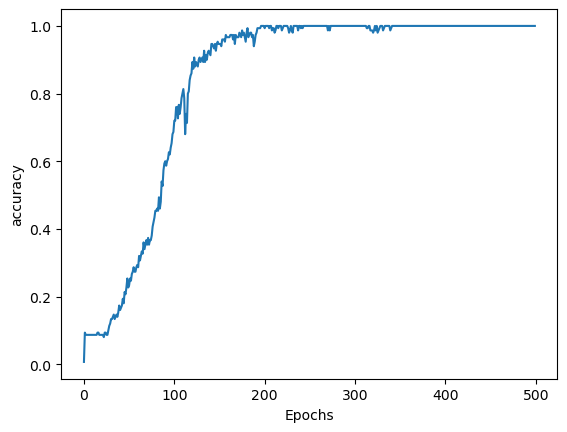

In [20]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

plot_metric(history, 'accuracy')

This graph shows how the accuracy of the model has increased from epoch by epoch. So, in the range of let's say 290 or 300 epoch, we reached close to hundred percent accuracy and it took the model somewhere around 250, 200 epochs to reach that accuracy level. 

#### Generate new text

In [22]:
seed_text = "It was a cold night."  # Initial seed text for generating predictions

##add number of words you want to predict
next_words = 100  # Number of words to generate

##run the loop to predict and concatenate the word
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]                      # Convert seed text to sequence of tokens
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')  # Pad sequences to the required length

    ##predict the class using the trained model
    predicted_probs = model.predict(token_list, verbose=0)  # Predict the next word probabilities
    predicted = np.argmax(predicted_probs, axis=-1)         # Get the index of the highest probability
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        
        ##reference the predicted class with the vocabulary
        if index == predicted:      # Match the predicted index to the word in the tokenizer
            output_word = word
            break
    seed_text += " " + output_word  # Append the predicted word to the seed text
    
print(seed_text)                    # Print the generated text

It was a cold night. thundered though thundered on the castle days fire end on for turned into muddy muddy streams and streams and hagrid's pumpkins swelled to the size of garden sheds sheds sheds sheds sheds sheds sheds sheds sheds sheds sheds sheds sheds sheds sheds sheds sheds percy percy percy percy percy percy percy percy percy percy percy percy percy percy percy percy percy percy sheds sheds sheds sheds sheds sheds sheds percy percy percy percy percy percy percy percy percy percy percy percy percy percy percy percy sheds sheds sheds sheds sheds sheds sheds percy percy percy percy percy percy percy percy


# Generate Poetry

This notebook serves as a challenge on how to create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

In [25]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.13.1


#### Step 1: Create a corpus

In [27]:
##printing the text
shakespeare_text = open('data/sonnets.txt').read()
print(len(shakespeare_text))

28893


In [28]:
##create corpus by lowering the letters and splitting the text by \n
corpus = shakespeare_text.lower().split("\n")
corpus[:10]

['i',
 '',
 ' from fairest creatures we desire increase,',
 " that thereby beauty's rose might never die,",
 ' but as the riper should by time decease,',
 ' his tender heir might bear his memory:',
 ' but thou, contracted to thine own bright eyes,',
 " feed'st thy light's flame with self-substantial fuel,",
 ' making a famine where abundance lies,',
 ' thy self thy foe, to thy sweet self too cruel:']

In [29]:
#print(corpus)

#### Step 2: Train the tokenizer and create word encoding dictionary

In [31]:
##set up tokenizer
tokenizer = Tokenizer()     # Initialize the tokenizer

tokenizer.fit_on_texts(corpus)              # Fit the tokenizer on the corpus to build word index

##calculate vocabulary size - be mindful of the token
vocab_size = len(tokenizer.word_index) + 1  # Calculate vocabulary size (+1 for the padding token)

#print(tokenizer.word_index)

print(vocab_size)           # Print the vocabulary size

1544


#### Step 3: Create N-gram sequence

In [33]:
##create sequences of 
input_sequences = []                                  # Initialize list to store sequences
for line in corpus:                                   # Iterate over each line in the corpus
    tokens = tokenizer.texts_to_sequences([line])[0]  # Convert the line to token indices
    for i in range(1, len(tokens)):                   # Create n-gram sequences
        n_gram_sequence = tokens[:i+1]                # Create sequence from the start up to the current index
        input_sequences.append(n_gram_sequence)       # Append the sequence to the list

#### Step 4: Pad those sequence

In [35]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])          # Determine the length of the longest sequence
input_seq_array = np.array(pad_sequences(input_sequences,     # Pad sequences to ensure uniform length
                                         maxlen=max_seq_len,  # Maximum length of sequences
                                         padding='pre')       # Pad sequences at the beginning
                        )

#### Step 5: Segregate features¶

In [37]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]      # Extract features: all columns except the last one
labels = input_seq_array[:, -1]  # Extract labels: the last column

##one-hot encode the labels to get y - since it is actually just a classification problem
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)  # Convert labels to one-hot encoded format

### Define the LSTM model

In [39]:
# Create a Sequential model
model = tf.keras.Sequential([ 
    
    # Embedding layer: Converts input sequences into dense vectors of fixed size
    tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),  # vocab_size: size of the vocabulary; 
                                                                             # 120: dimensionality of the output space; 
                                                                             # max_seq_len-1: length of input sequences
    
    # Bidirectional LSTM layer: Processes the input sequences in both forward and backward directions to capture context from both sides
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),  # 120: number of output units for the LSTM layer

    # Dense layer: Output layer that produces a probability distribution over the vocabulary (softmax activation function)
    tf.keras.layers.Dense(vocab_size, activation='softmax')  # vocab_size: number of output neurons equal to the size of the vocabulary; 
                                                             # 'softmax': activation function for multi-class classification
])

# Define the learning rate - step size for the optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)  # Adam optimizer with a learning rate of 0.01

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy',  # Loss function for multi-class classification
              optimizer=adam,                   # Optimizer to use for updating the model weights
              metrics=['accuracy'])             # Metric to evaluate the model's performance

# Train the model
history = model.fit(X, y,        # X: input data; y: target data
                    epochs=200,  # Number of epochs (iterations over the entire dataset)
                    verbose=1)   # Verbosity mode; 1 displays progress bar

Epoch 1/200
142/142 [==============================] - 10s 27ms/step - loss: 6.6995 - accuracy: 0.0230
Epoch 2/200
142/142 [==============================] - 3s 24ms/step - loss: 6.0449 - accuracy: 0.0415
Epoch 3/200
142/142 [==============================] - 3s 25ms/step - loss: 5.3739 - accuracy: 0.0696
Epoch 4/200
142/142 [==============================] - 4s 25ms/step - loss: 4.4038 - accuracy: 0.1335
Epoch 5/200
142/142 [==============================] - 3s 24ms/step - loss: 3.2641 - accuracy: 0.2921
Epoch 6/200
142/142 [==============================] - 3s 24ms/step - loss: 2.2285 - accuracy: 0.4872
Epoch 7/200
142/142 [==============================] - 4s 25ms/step - loss: 1.5182 - accuracy: 0.6456
Epoch 8/200
142/142 [==============================] - 3s 24ms/step - loss: 1.0113 - accuracy: 0.7689
Epoch 9/200
142/142 [==============================] - 3s 23ms/step - loss: 0.7314 - accuracy: 0.8369
Epoch 10/200
142/142 [==============================] - 3s 24ms/step - loss: 0.58

### Visualise the metrics

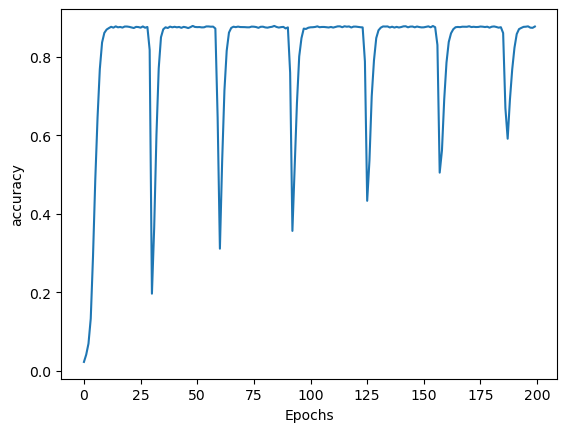

In [41]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

plot_metric(history, 'accuracy')

### Generate new text

In [43]:
seed_text = "It was a cold night."  # Starting text for generating new words
next_words = 100                    # Number of words to generate

# Loop to generate the next 'next_words' words
for _ in range(next_words):
    
    # Convert the seed text to a sequence of integers based on the tokenizer's vocabulary
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pad the sequence to ensure it matches the input length required by the model
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    
    # Predict the probability distribution of the next word using the model
    predicted_probs = model.predict(token_list, verbose=0)  # Use predict() to get probabilities
    
    # Get the index of the word with the highest predicted probability
    predicted = np.argmax(predicted_probs, axis=-1)  # Find the index of the max probability
    
    output_word = ""  # Initialize an empty string to store the predicted word
    
    # Loop through the tokenizer's word index to find the word corresponding to the predicted index
    for word, index in tokenizer.word_index.items():
        
        if index == predicted:  # Check if the index matches the predicted index
            output_word = word  # If it matches, set the output word
            break               # Exit the loop as we found the word
    
    # Append the predicted word to the seed text to form a new input for the next prediction
    seed_text += " " + output_word

print(seed_text)  # Print the generated text

It was a cold night. my cloak day my grief me receivest hence thee be thee hence thee thee tongue rain is it for thee me ' through as if self art me more days me travel forth without my brow muse me more beauty hidden thee me hence thee me ' is me mine me me number me but me me alack that am fair me me me before me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me me
